In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp

In [3]:
# Key constants from paper
N_QUBITS = 4       # LiH after tapering
N_LAYERS = 4        # Ansatz depth
SHOTS = 64          # Paper uses 64 shots/expectation
TIME_POINTS = 20    # Discretization points

In [7]:
hamiltonian_0 = SparsePauliOp.from_list(
    [
        ("IIII", -0.313),
        ("ZIII", -0.219),
        ("IZII", 0.055),
        ("IIZI", 0.219),
        ("IIIZ", -0.055),
    ]
)

In [4]:
paulis = ['IIII', 'IIIZ', 'IIZZ', 'IIZI', 'IZII', 'IZIZ', 'ZXII', 'ZXIZ', 'IXII',
 'IXIZ', 'ZZII', 'ZZIZ', 'ZIII', 'ZIIZ', 'IIZX', 'IIIX', 'IZZX', 'IZIX',
 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZZZX', 'ZZIX', 'ZIZX', 'ZIIX', 'XXXX',
 'YYXX', 'XXYY', 'YYYY', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'IZZZ', 'ZXZZ',
 'IXZZ', 'ZZZZ', 'ZIZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI', 'XZXZ', 'XIXZ',
 'XZXI', 'XIXI', 'IZZI', 'ZXZI', 'IXZI', 'ZZZI', 'ZIZI']
coeffs = [-0.31332432+0.j, -0.05555966+0.j, -0.19396161+0.j,  0.21911331+0.j,
  0.05555966+0.j, -0.10721949+0.j,  0.02729061+0.j,  0.01744152+0.j,
  0.02729061+0.j,  0.01744152+0.j, -0.19396161+0.j,  0.05325329+0.j,
 -0.21911331+0.j,  0.05773691+0.j, -0.02729061+0.j,  0.02729061+0.j,
  0.01744152+0.j, -0.01744152+0.j, -0.00808259+0.j, -0.00808259+0.j,
  0.00808259+0.j,  0.00808259+0.j,  0.00451091+0.j, -0.00451091+0.j,
  0.00533818+0.j, -0.00533818+0.j,  0.00521231+0.j, -0.00521231+0.j,
 -0.00521231+0.j,  0.00521231+0.j, -0.00541027+0.j,  0.00541027+0.j,
  0.00541027+0.j, -0.00541027+0.j, -0.05325329+0.j, -0.00451091+0.j,
 -0.00451091+0.j,  0.07943787+0.j,  0.06904256+0.j,  0.00541027+0.j,
 -0.00541027+0.j,  0.00541027+0.j, -0.00541027+0.j, -0.01032932+0.j,
  0.01032932+0.j, -0.01032932+0.j,  0.01032932+0.j,  0.05773691+0.j,
  0.00533818+0.j,  0.00533818+0.j, -0.06904256+0.j, -0.07823638+0.j]
hamiltonian_T = SparsePauliOp.from_list(list(zip(paulis, coeffs)))

In [8]:
def create_ansatz():
    """4-layer RY ansatz with final X gates (Fig 1)"""
    params = ParameterVector("θ", N_LAYERS * N_QUBITS + 4)  # 20 params
    qc = QuantumCircuit(N_QUBITS)
    
    # Initial |0000⟩ state
    # for q in range(N_QUBITS):
    #     qc.h(q)
    
    # 4 RY layers with linear entanglement
    param_idx = 0
    for _ in range(N_LAYERS):
        for q in range(N_QUBITS):
            qc.ry(params[param_idx], q)
            param_idx += 1
        # Linear entanglement
        for q in range(N_QUBITS-1):
            qc.cx(q, q+1)
    
    # Final RY layer (extra parameters)
    for q in range(N_QUBITS):
        qc.ry(params[param_idx], q)
        param_idx += 1
    
    # Final X gates to prepare |0110⟩ at θ=0
    qc.x(1)
    qc.x(2)
    
    return qc

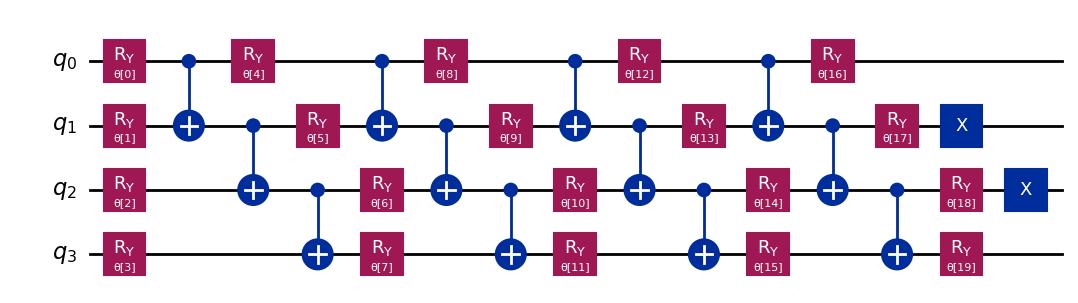

In [9]:
ansatz = create_ansatz()
ansatz.draw(output="mpl")